# Ceng 474 Project - Machine Learning Process with Airbnb Istanbul Data

**Merve KARAKAYA**

# Exploratory Data Analysis and Visualizations

***Import libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from numpy import unique
%matplotlib inline

***Examining the data set story and its structure.***

In [2]:
# Reading data set
airbnb = pd.read_csv("AirbnbIstanbul.csv")
#First 5 observation displays
print(airbnb.head(5))

      id                                 name  host_id host_name  \
0   4826                            The Place     6603      Kaan   
1  20815    The Bosphorus from The Comfy Hill    78838    Gülder   
2  25436  House for vacation rental furnutare   105823     Yesim   
3  27271      LOVELY APT. IN PERFECT LOCATION   117026     Mutlu   
4  28277       Duplex Apartment with Terrace    121607      Alen   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Uskudar  41.05650   29.05367  Entire home/apt   
1                  NaN      Besiktas  41.06984   29.04545  Entire home/apt   
2                  NaN      Besiktas  41.07731   29.03891  Entire home/apt   
3                  NaN       Beyoglu  41.03220   28.98216  Entire home/apt   
4                  NaN         Sisli  41.04471   28.98567  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    554               1                  1 

In [3]:
#last 5 observation displays
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16246,32452512,Best place of town,29568076,Antonio,NaN,Sisli,41.04775,28.99283,Entire home/apt,248,1,0,NaN,NaN,4,365
16247,32453285,luxury flat in city center atiye str nisantası,29568076,Antonio,NaN,Sisli,41.04775,28.99283,Entire home/apt,248,1,0,NaN,NaN,4,358
16248,32453323,Double Room,228430419,Saladin,NaN,Fatih,41.00435,28.97692,Private room,237,2,0,NaN,NaN,1,364
16249,32455952,Cozy room in charming home at the heart of Bey...,108703005,Pelin,NaN,Beyoglu,41.03118,28.97837,Private room,53,3,0,NaN,NaN,2,345
16250,32457561,Perfect view with comfortable room,25991676,Uğur,NaN,Kadikoy,40.99467,29.05423,Private room,100,1,0,NaN,NaN,1,364


***Data set structural information***

In [4]:
#Data set has 16251 samples(rows) and 16 features(columns)
airbnb.shape

(16251, 16)

In [5]:
#Displaying these columns meanly features
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#Detailed representation these columns meanly features
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16251 non-null  object 
 6   latitude                        16251 non-null  float64
 7   longitude                       16251 non-null  float64
 8   room_type                       16251 non-null  object 
 9   price                           16251 non-null  int64  
 10  minimum_nights                  16251 non-null  int64  
 11  number_of_reviews               16251 non-null  int64  
 12  last_review                     

In [7]:
#Data types in these columns
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
#Basic descriptive statistics for features
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16251.0,1.885640e+07,1.054805e+07,4826.00000,8.500978e+06,2.161975e+07,2.870219e+07,3.245756e+07
host_id,16251.0,8.888706e+07,8.162114e+07,6603.00000,1.788230e+07,5.210740e+07,1.681345e+08,2.437341e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,16251.0,4.102646e+01,4.319838e-02,40.81469,4.100436e+01,4.103135e+01,4.104781e+01,4.141442e+01
longitude,16251.0,2.898539e+01,1.143578e-01,28.03200,2.897413e+01,2.898426e+01,2.902245e+01,2.990778e+01
price,16251.0,3.547239e+02,1.428938e+03,0.00000,1.050000e+02,1.900000e+02,3.270000e+02,5.956100e+04
minimum_nights,16251.0,4.692942e+00,2.891610e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.125000e+03
number_of_reviews,16251.0,7.186758e+00,2.143962e+01,0.00000,0.000000e+00,0.000000e+00,4.000000e+00,3.070000e+02
reviews_per_month,7767.0,9.147663e-01,1.086907e+00,0.01000,1.800000e-01,5.200000e-01,1.190000e+00,1.200000e+01
calculated_host_listings_count,16251.0,4.103809e+00,7.648227e+00,1.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.700000e+01


In [9]:
#Slightly more detailed descriptive statistics for features
airbnb.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,16251,NaN,NaN,NaN,1.88564e+07,1.0548e+07,4826,8.50098e+06,2.16198e+07,2.87022e+07,3.24576e+07
name,16160,15493,İstanbul Birden fazla bölümden oluşan bina,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,16251,NaN,NaN,NaN,8.88871e+07,8.16211e+07,6603,1.78823e+07,5.21074e+07,1.68135e+08,2.43734e+08
host_name,16244,3797,Mehmet,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,16251,39,Beyoglu,4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,16251,NaN,NaN,NaN,41.0265,0.0431984,40.8147,41.0044,41.0314,41.0478,41.4144
longitude,16251,NaN,NaN,NaN,28.9854,0.114358,28.032,28.9741,28.9843,29.0224,29.9078
room_type,16251,3,Private room,8565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,16251,NaN,NaN,NaN,354.724,1428.94,0,105,190,327,59561


***Visual analysis before data cleaning***

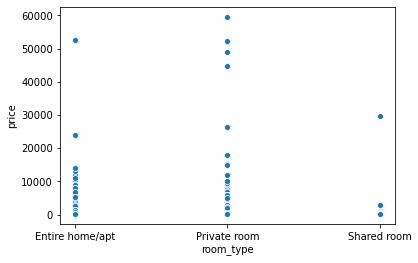

In [10]:
#Relationship of room type to pricing
sns.scatterplot(x = "room_type", y = "price", data = airbnb);

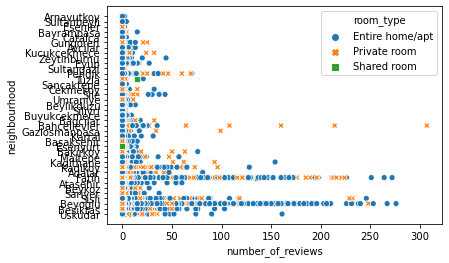

In [11]:
#Investigation of the number of reviews with the neighborhood according to room types
sns.scatterplot(x = "number_of_reviews", y = "neighbourhood", hue = "room_type", style = "room_type", data = airbnb);
#sns.plt.ylim(0,20)
#sns.plt.xlim(0,None)

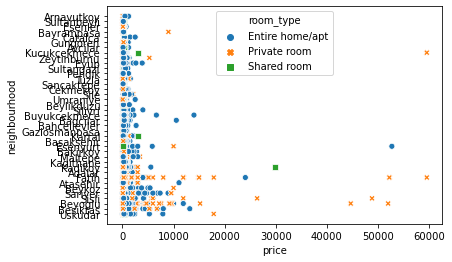

In [12]:
#Investigation of the price with the neighborhood according to room types
sns.scatterplot(x = "price", y = "neighbourhood", hue = "room_type", style = "room_type", data = airbnb);

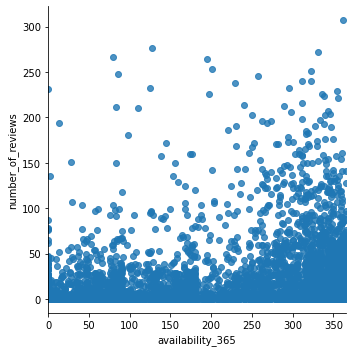

In [13]:
#The relationship between the number of reviews and airbnb's availibility in a year
sns.lmplot(x = "availability_365", y = "number_of_reviews", data = airbnb);

In [14]:
#Relationships of features with each other by correlation
airbnb.corr()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.679662,NaN,-0.021689,-0.025538,0.005983,-0.025142,-0.269707,0.269992,-0.030279,-0.169436
host_id,0.679662,1.000000,NaN,-0.014529,-0.058144,0.009993,-0.027572,-0.205073,0.147374,-0.103338,-0.123720
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.021689,-0.014529,NaN,1.000000,-0.184363,0.032536,0.006076,-0.025143,-0.039408,0.001483,-0.001116
longitude,-0.025538,-0.058144,NaN,-0.184363,1.000000,-0.022089,-0.006377,-0.001883,-0.015978,-0.033867,-0.034483
price,0.005983,0.009993,NaN,0.032536,-0.022089,1.000000,0.016585,-0.019262,-0.032012,0.030100,0.047015
minimum_nights,-0.025142,-0.027572,NaN,0.006076,-0.006377,0.016585,1.000000,-0.015149,-0.036223,-0.020916,0.015297
number_of_reviews,-0.269707,-0.205073,NaN,-0.025143,-0.001883,-0.019262,-0.015149,1.000000,0.496183,0.174663,0.043230
reviews_per_month,0.269992,0.147374,NaN,-0.039408,-0.015978,-0.032012,-0.036223,0.496183,1.000000,0.051228,-0.063728
calculated_host_listings_count,-0.030279,-0.103338,NaN,0.001483,-0.033867,0.030100,-0.020916,0.174663,0.051228,1.000000,0.173068


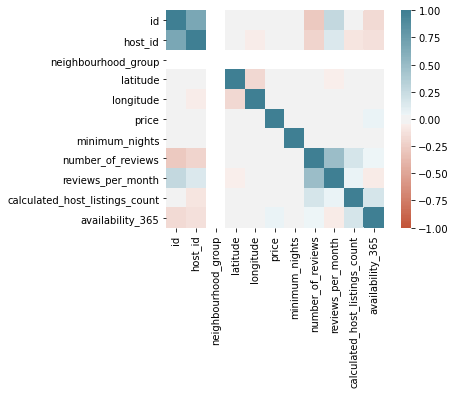

In [15]:
#Visual representation of the properties' relationships with each other by correlation
corr=airbnb.corr()
h=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)

Text(0, 0.5, 'Number of Listings')

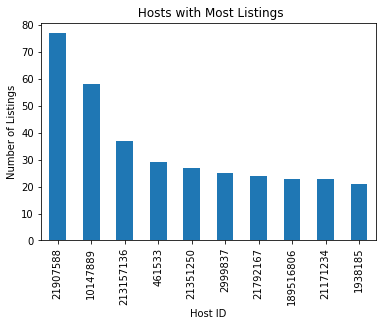

In [16]:
#The number of Airbnb lists by hosts with ids (for top 10 observation)
chart_host = airbnb["host_id"].value_counts().head(10).plot.bar()
chart_host.set_title(" Hosts with Most Listings")
chart_host.set_xlabel("Host ID")
chart_host.set_ylabel("Number of Listings")

Text(0.5, 1.0, 'Average Price of Host IDs')

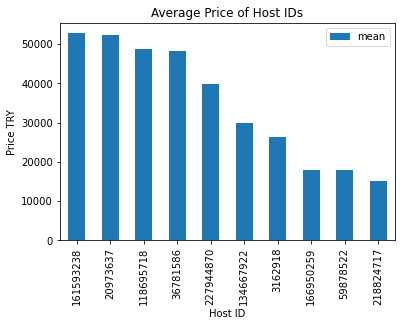

In [17]:
#Average price by host_id (for top 10 observation)
neighbourhood_price = airbnb.groupby("host_id")["price"].agg(['mean']) 
chart_avg_price = neighbourhood_price.sort_values(by='mean', ascending=False).head(10).plot.bar()
chart_avg_price.set_ylabel('Price TRY')
chart_avg_price.set_xlabel('Host ID')
chart_avg_price.set_title("Average Price of Host IDs")

Text(0, 0.5, 'Number of Listings')

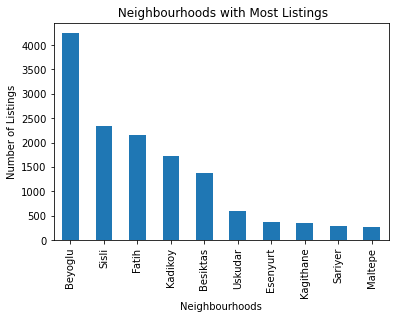

In [18]:
#The number of Airbnb lists by neighbourhoods (for top 10 observation)
chart_neighbourhoods = airbnb["neighbourhood"].value_counts().head(10).plot.bar()
chart_neighbourhoods.set_title(" Neighbourhoods with Most Listings")
chart_neighbourhoods.set_xlabel("Neighbourhoods")
chart_neighbourhoods.set_ylabel("Number of Listings")

Text(0.5, 1.0, 'Average Price of Neighbourhoods')

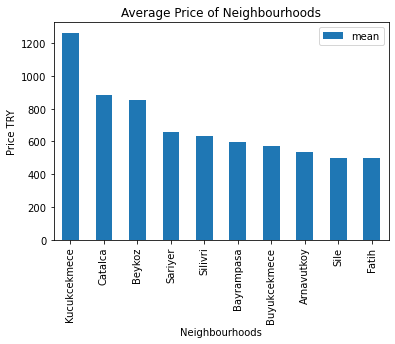

In [19]:
#Average price by neighborhood (for top 10 observation)
neighbourhood_price = airbnb.groupby("neighbourhood")["price"].agg(['mean']) 
chart_avg_price = neighbourhood_price.sort_values(by='mean', ascending=False).head(10).plot.bar()
chart_avg_price.set_ylabel('Price TRY')
chart_avg_price.set_xlabel('Neighbourhoods')
chart_avg_price.set_title("Average Price of Neighbourhoods")

***Examination of Missing Data***

In [20]:
#Are there any missing observations (values)
airbnb.isnull().values.any()

True

In [21]:
#In which variable how many
airbnb.isnull().sum()

id                                    0
name                                 91
host_id                               0
host_name                             7
neighbourhood_group               16251
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8484
reviews_per_month                  8484
calculated_host_listings_count        0
availability_365                      0
dtype: int64

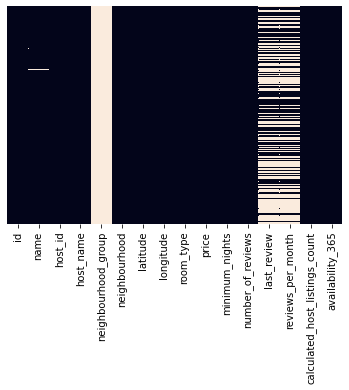

In [22]:
#Some features have missing data:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)
#White color indicates missing values

***Data Cleaning***

***Empty columns according to the results from heatmap should be dropped***

In [23]:
airbnb.drop('neighbourhood_group',axis=1,inplace=True)

***Some unnecessary features should also be dropped***

In [24]:
airbnb.drop('last_review',axis=1,inplace=True)

In [25]:
#Checking drop process
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

***Features containing some missing data should be corrected***

In [26]:
airbnb.info()
print("\n")
airbnb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood                   16251 non-null  object 
 5   latitude                        16251 non-null  float64
 6   longitude                       16251 non-null  float64
 7   room_type                       16251 non-null  object 
 8   price                           16251 non-null  int64  
 9   minimum_nights                  16251 non-null  int64  
 10  number_of_reviews               16251 non-null  int64  
 11  reviews_per_month               7767 non-null   float64
 12  calculated_host_listings_count  

id                                   0
name                                91
host_id                              0
host_name                            7
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 8484
calculated_host_listings_count       0
availability_365                     0
dtype: int64

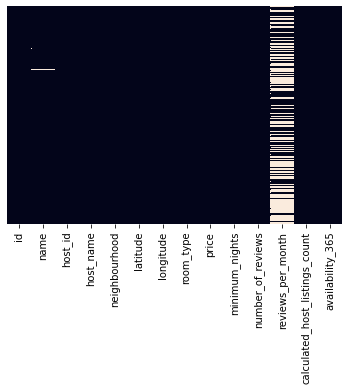

In [27]:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)

In [28]:
#Correction function of reviews_per_month data 
def impute_reviews_per_month(cols):
    reviews = cols[0]
      
    if pd.isnull(reviews):
        return 0 #that means it has never been examined
    else:
        return reviews

In [29]:
#Function call for impute_reviews_per_month
airbnb['reviews_per_month']=airbnb[['reviews_per_month']].apply(impute_reviews_per_month, axis =1 )

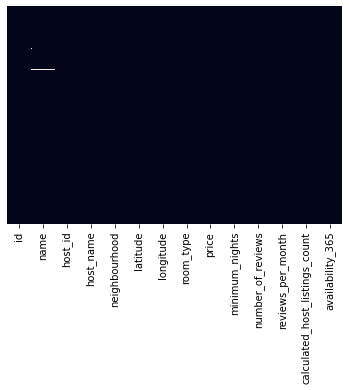

In [30]:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)

In [31]:
#Checking results
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16251 non-null  int64  
 1   name                            16160 non-null  object 
 2   host_id                         16251 non-null  int64  
 3   host_name                       16244 non-null  object 
 4   neighbourhood                   16251 non-null  object 
 5   latitude                        16251 non-null  float64
 6   longitude                       16251 non-null  float64
 7   room_type                       16251 non-null  object 
 8   price                           16251 non-null  int64  
 9   minimum_nights                  16251 non-null  int64  
 10  number_of_reviews               16251 non-null  int64  
 11  reviews_per_month               16251 non-null  float64
 12  calculated_host_listings_count  

In [32]:
#Correction for missing data in name
airbnb.dropna(inplace = True)

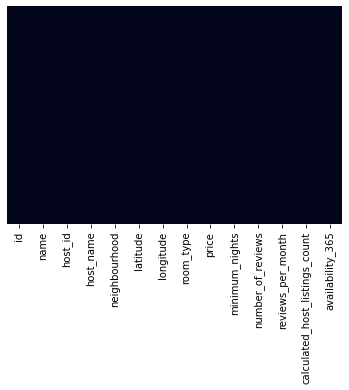

In [33]:
sns.heatmap(airbnb.isnull(), yticklabels = False, cbar = False)

In [34]:
#Checking results
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 0 to 16250
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16155 non-null  int64  
 1   name                            16155 non-null  object 
 2   host_id                         16155 non-null  int64  
 3   host_name                       16155 non-null  object 
 4   neighbourhood                   16155 non-null  object 
 5   latitude                        16155 non-null  float64
 6   longitude                       16155 non-null  float64
 7   room_type                       16155 non-null  object 
 8   price                           16155 non-null  int64  
 9   minimum_nights                  16155 non-null  int64  
 10  number_of_reviews               16155 non-null  int64  
 11  reviews_per_month               16155 non-null  float64
 12  calculated_host_listings_count  

***Categorical Features***

In [35]:
#Selecting categorical data
a=airbnb.copy()
categorical_a = a.select_dtypes(include = ["object"])
categorical_a.head(5)

,name,host_name,neighbourhood,room_type
0,The Place,Kaan,Uskudar,Entire home/apt
1,The Bosphorus from The Comfy Hill,Gülder,Besiktas,Entire home/apt
2,House for vacation rental furnutare,Yesim,Besiktas,Entire home/apt
3,LOVELY APT. IN PERFECT LOCATION,Mutlu,Beyoglu,Entire home/apt
4,Duplex Apartment with Terrace,Alen,Sisli,Entire home/apt


In [36]:
categorical_a.tail(5)

,name,host_name,neighbourhood,room_type
16246,Best place of town,Antonio,Sisli,Entire home/apt
16247,luxury flat in city center atiye str nisantası,Antonio,Sisli,Entire home/apt
16248,Double Room,Saladin,Fatih,Private room
16249,Cozy room in charming home at the heart of Bey...,Pelin,Beyoglu,Private room
16250,Perfect view with comfortable room,Uğur,Kadikoy,Private room


In [37]:
#Total class numbers of neighbourhood categorical data
categorical_a["neighbourhood"].value_counts().count()

39

In [38]:
#Class numbers of categorical data which is neighbourhood and its numbers
categorical_a["neighbourhood"].value_counts()

Beyoglu          4216
Sisli            2332
Fatih            2135
Kadikoy          1708
Besiktas         1354
Uskudar           588
Esenyurt          378
Kagithane         353
Sariyer           297
Maltepe           261
Atasehir          257
Bakirkoy          196
Bahcelievler      185
Adalar            162
Pendik            144
Umraniye          136
Basaksehir        130
Eyup              126
Kartal            125
Avcilar           118
Kucukcekmece      112
Buyukcekmece      107
Bagcilar           90
Beykoz             88
Zeytinburnu        75
Beylikduzu         69
Sile               59
Gaziosmanpasa      59
Tuzla              57
Gungoren           57
Cekmekoy           42
Sancaktepe         30
Silivri            25
Esenler            18
Bayrampasa         18
Sultangazi         18
Sultanbeyli        17
Arnavutkoy          7
Catalca             6
Name: neighbourhood, dtype: int64

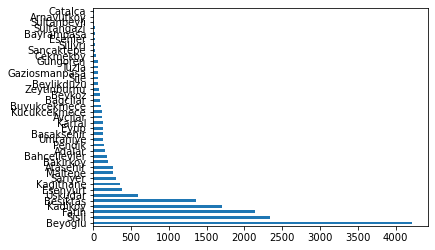

In [39]:
#Visual representation
categorical_a["neighbourhood"].value_counts().plot.barh();

In [40]:
#Total class numbers of room_type categorical data
categorical_a["room_type"].value_counts().count()

3

In [41]:
#Class numbers of categorical data which is room_type and its numbers
categorical_a["room_type"].value_counts()

Private room       8501
Entire home/apt    7164
Shared room         490
Name: room_type, dtype: int64

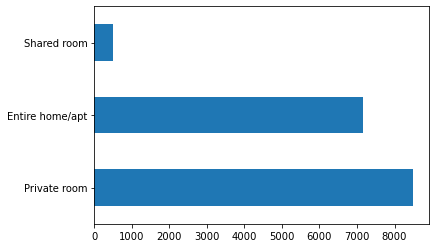

In [42]:
#Visual representation
categorical_a["room_type"].value_counts().plot.barh();

In [43]:
#Converting categorical variables into "dummy" or indicator variables 
Room_type =pd.get_dummies(airbnb['room_type'])
Room_type.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
#Converting categorical variables into "dummy" or indicator variables 
Neighbourhood=pd.get_dummies(airbnb['neighbourhood'])
Neighbourhood.head()

,Adalar,Arnavutkoy,Atasehir,Avcilar,Bagcilar,Bahcelievler,Bakirkoy,Basaksehir,Bayrampasa,Besiktas,...,Sariyer,Sile,Silivri,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Add new dummy columns to data frame
airbnb = pd.concat([airbnb,Neighbourhood,Room_type],axis = 1)

In [46]:
#Checking airbnb.columns
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu,Entire home/apt,Private room,Shared room
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,554,1,...,0,0,0,0,0,1,0,1,0,0
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,100,30,...,0,0,0,0,0,0,0,1,0,0


In [47]:
#Drop the old categorical columns
airbnb.drop(['neighbourhood', 'room_type'], axis = 1, inplace = True)
airbnb.head(2)

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,...,Sisli,Sultanbeyli,Sultangazi,Tuzla,Umraniye,Uskudar,Zeytinburnu,Entire home/apt,Private room,Shared room
0,4826,The Place,6603,Kaan,41.05650,29.05367,554,1,1,0.01,...,0,0,0,0,0,1,0,1,0,0
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,41.06984,29.04545,100,30,41,0.38,...,0,0,0,0,0,0,0,1,0,0


In [48]:
#Checking
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Adalar',
       'Arnavutkoy', 'Atasehir', 'Avcilar', 'Bagcilar', 'Bahcelievler',
       'Bakirkoy', 'Basaksehir', 'Bayrampasa', 'Besiktas', 'Beykoz',
       'Beylikduzu', 'Beyoglu', 'Buyukcekmece', 'Catalca', 'Cekmekoy',
       'Esenler', 'Esenyurt', 'Eyup', 'Fatih', 'Gaziosmanpasa', 'Gungoren',
       'Kadikoy', 'Kagithane', 'Kartal', 'Kucukcekmece', 'Maltepe', 'Pendik',
       'Sancaktepe', 'Sariyer', 'Sile', 'Silivri', 'Sisli', 'Sultanbeyli',
       'Sultangazi', 'Tuzla', 'Umraniye', 'Uskudar', 'Zeytinburnu',
       'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

***Numerical Features***

In [49]:
#Selecting numerical data
a=airbnb.copy()
numerical_a = a.select_dtypes(include = ["float64", "int64"])
numerical_a.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,6603,41.05650,29.05367,554,1,1,0.01,1,365
1,20815,78838,41.06984,29.04545,100,30,41,0.38,2,49
2,25436,105823,41.07731,29.03891,211,21,0,0.00,1,83
3,27271,117026,41.03220,28.98216,237,5,2,0.04,1,228
4,28277,121607,41.04471,28.98567,591,3,0,0.00,13,356


In [50]:
#Descriptive statistics for numerical features
numerical_a.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16155.0,1.892356e+07,1.054002e+07,4826.00000,8.620952e+06,2.173537e+07,2.872495e+07,3.245756e+07
host_id,16155.0,8.922279e+07,8.173022e+07,6603.00000,1.792181e+07,5.243358e+07,1.691285e+08,2.437341e+08
latitude,16155.0,4.102640e+01,4.324062e-02,40.81469,4.100435e+01,4.103132e+01,4.104780e+01,4.141442e+01
longitude,16155.0,2.898539e+01,1.145895e-01,28.03200,2.897410e+01,2.898426e+01,2.902257e+01,2.990778e+01
price,16155.0,3.552899e+02,1.433063e+03,0.00000,1.050000e+02,1.850000e+02,3.270000e+02,5.956100e+04
minimum_nights,16155.0,4.710740e+00,2.900055e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.125000e+03
number_of_reviews,16155.0,7.223522e+00,2.149608e+01,0.00000,0.000000e+00,0.000000e+00,4.000000e+00,3.070000e+02
reviews_per_month,16155.0,4.396057e-01,8.814282e-01,0.00000,0.000000e+00,0.000000e+00,4.800000e-01,1.200000e+01
calculated_host_listings_count,16155.0,4.118353e+00,7.666705e+00,1.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.700000e+01
availability_365,16155.0,2.494595e+02,1.359772e+02,0.00000,1.020000e+02,3.400000e+02,3.650000e+02,3.650000e+02


In [51]:
#Descriptive statistics for price feature
numerical_a["price"].describe()

count    16155.000000
mean       355.289941
std       1433.062707
min          0.000000
25%        105.000000
50%        185.000000
75%        327.000000
max      59561.000000
Name: price, dtype: float64

In [52]:
#Slightly more detailed descriptive statistics for price feature
print("Mean: " + str(numerical_a["price"].mean()))
print("Number of Full Observations: " + str(numerical_a["price"].count())) 
print("Max Value: " + str(numerical_a["price"].max()))
print("Min Value: " + str(numerical_a["price"].min()))
print("Median: " + str(numerical_a["price"].median()))
print("Standart Deviation: " + str(numerical_a["price"].std()))

Mean: 355.28994119467654
Number of Full Observations: 16155
Max Value: 59561
Min Value: 0
Median: 185.0
Standart Deviation: 1433.0627072935586


***Visual analysis after data cleaning***

Bar Plot

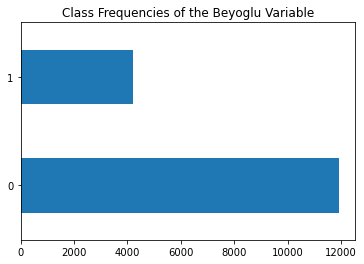

In [53]:
#Visual representation of the neighborhood with the most airbnb lists
airbnb["Beyoglu"].value_counts().plot.barh().set_title("Class Frequencies of the Beyoglu Variable");

Cat Plot

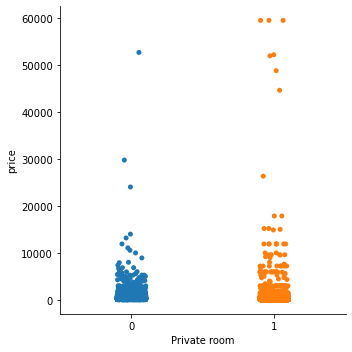

In [54]:
#Private room and price relation representation
sns.catplot(x = "Private room", y = "price", data = airbnb);

Histogram

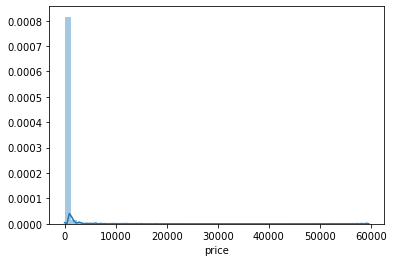

In [55]:
#distribution of price
sns.distplot(airbnb.price);

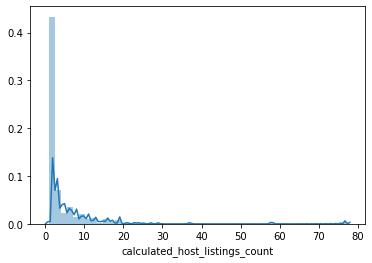

In [56]:
#distribution of host listing counts
sns.distplot(airbnb["calculated_host_listings_count"])

Box Plot

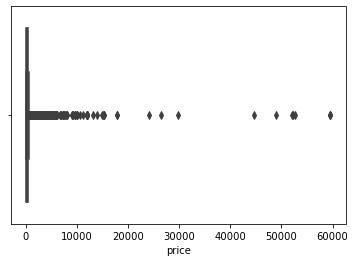

In [57]:
#Visualizing the price distribution
sns.boxplot(x = airbnb["price"]);

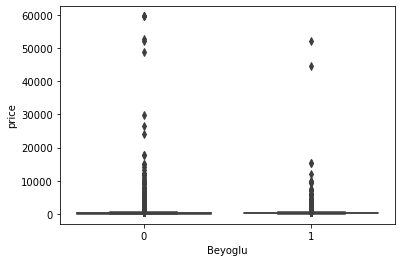

In [58]:
#The relationship of the neighborhood with the highest lists
sns.boxplot(x = "Beyoglu", y = "price", data = airbnb)

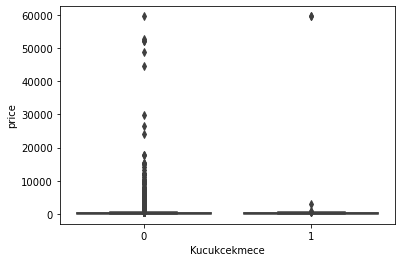

In [59]:
#The relationship of the neighborhood with the highest average price
sns.boxplot(x = "Kucukcekmece", y = "price", data = airbnb)

Scatter Plot

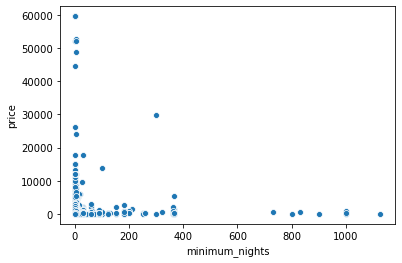

In [60]:
#The relationship between the minimum number of nights stayed and the price
sns.scatterplot(x = "minimum_nights", y = "price", data = airbnb);

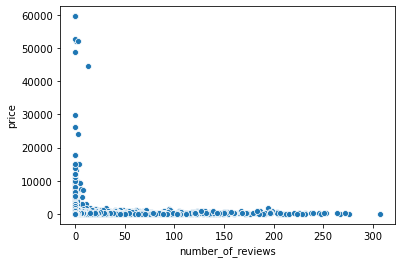

In [61]:
#The relationship between the number of reviews and the price
sns.scatterplot(x = "number_of_reviews", y = "price", data = airbnb);

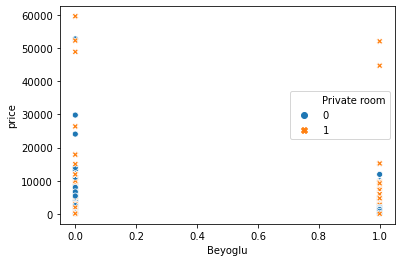

In [62]:
#The relationship between Beyoglu neighbourhood and the price via private room type
sns.scatterplot(x = "Beyoglu", y = "price", hue = "Private room", style = "Private room", data = airbnb);

## Preparation before building models 

***Grouping the price which is target variable to apply the classification models***

In [63]:
airbnb['low_price']=airbnb['price']-airbnb['price']
airbnb['high_price']=airbnb['price']-airbnb['price']

In [64]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Adalar',
       'Arnavutkoy', 'Atasehir', 'Avcilar', 'Bagcilar', 'Bahcelievler',
       'Bakirkoy', 'Basaksehir', 'Bayrampasa', 'Besiktas', 'Beykoz',
       'Beylikduzu', 'Beyoglu', 'Buyukcekmece', 'Catalca', 'Cekmekoy',
       'Esenler', 'Esenyurt', 'Eyup', 'Fatih', 'Gaziosmanpasa', 'Gungoren',
       'Kadikoy', 'Kagithane', 'Kartal', 'Kucukcekmece', 'Maltepe', 'Pendik',
       'Sancaktepe', 'Sariyer', 'Sile', 'Silivri', 'Sisli', 'Sultanbeyli',
       'Sultangazi', 'Tuzla', 'Umraniye', 'Uskudar', 'Zeytinburnu',
       'Entire home/apt', 'Private room', 'Shared room', 'low_price',
       'high_price'],
      dtype='object')

In [65]:
# Imputation function for low_price
def impute_low_price(cols):
    Price = cols[0]
    Low_Price = cols[1]
    
    if (Price<2000):
        return 1
    else:
        return Low_Price

In [66]:
# Apply the function to the low_price column
airbnb['low_price']=airbnb[['price','low_price']].apply(impute_low_price, axis =1 )

In [67]:
airbnb['low_price'].value_counts()

1    15929
0      226
Name: low_price, dtype: int64

In [68]:
# Imputation function for high_price
def impute_high_price(cols):
    Price = cols[0]
    High_Price = cols[1]
    
    if (Price>2000):
        return 1
    else:
        return High_Price

In [69]:
# Apply the function to the high_price column
airbnb['high_price']=airbnb[['price','high_price']].apply(impute_high_price, axis =1 )

In [70]:
airbnb['high_price'].value_counts()

0    15929
1      226
Name: high_price, dtype: int64

# Methods

## Building Classification Models

## Logistic Regression Model

***Splitting data as Train and Test:***

In [71]:
#Separate data into x and y variables
x = airbnb.drop(['low_price', 'host_name','name','id','reviews_per_month'],axis = 1) 
#x is everything else(except all dropped features)
y = airbnb['low_price'] 
#y is the column to predict

In [72]:
#Use x and y variables to split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#30% test 70% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state= 101)
#print (rows,columns) of x
print(x_train.shape)
print(x_test.shape)

(11308, 51)
(4847, 51)


***Building Model***

In [73]:
#Import LogisticRegression model
from sklearn.linear_model import LogisticRegression

#Create instance of model
logmodel = LogisticRegression(solver='lbfgs',max_iter=500)

***Training Model on Train Data***

In [74]:
#Training logmodel with train datas
#logmodel=make_pipeline(StandardScaler(), LogisticRegression())
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=500)

***Predicting on Test Data***

In [75]:
#Make predictions on test data
predictions = logmodel.predict(x_test)
print(predictions)
print(y_test)

[1 1 1 ... 1 1 1]
10889    0
6894     1
11540    1
14932    1
8505     1
        ..
5243     1
3145     1
5214     1
7994     1
10309    1
Name: low_price, Length: 4847, dtype: int64


In [76]:
#Show predictions with a table
pf = pd.DataFrame({'Actual' : y_test,'Predicted':predictions})
pf.head(10)

,Actual,Predicted
10889,0,1
6894,1,1
11540,1,1
14932,1,1
8505,1,1
11553,1,1
14912,1,1
4525,1,1
6086,1,1
960,0,1


In [77]:
pf.tail(10)

,Actual,Predicted
13239,1,1
9834,1,1
8972,1,1
11109,1,1
2168,1,1
5243,1,1
3145,1,1
5214,1,1
7994,1,1
10309,1,1


In [78]:
#Total test samples
pf.shape

(4847, 2)

In [79]:
#How many correctly samples our model predicted
pf[pf['Actual']==pf['Predicted']].count()
#As a result, out of 4847 samples, 4780 were predicted correctly

Actual       4780
Predicted    4780
dtype: int64

In [80]:
#Finding accuracy 
#Thus, 4780 out of 4847 samples are correctly predict
accuracy=(4780/4847)*100
print(accuracy)

98.61770167113679


***Model Evaluation***

***It can be evaluated whether the accuracy of the model is good or the model can predict well according to two functions:***

***Classification Report***

In [81]:
#Classification report results
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.99      1.00      0.99      4780

    accuracy                           0.99      4847
   macro avg       0.49      0.50      0.50      4847
weighted avg       0.97      0.99      0.98      4847



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Confusion Matrix***

In [82]:
#Confusion matrix results
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[   0,   67],
       [   0, 4780]], dtype=int64)

## k Nearest Neighbor(kNN) Model

***Building Model***

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

***Training and Predicting Models with Different k Values***

***k=1***

In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
Actual = y_test
Predicted = knn.predict(x_test)

In [86]:
#The accuracy for the knn k=1 model
from sklearn.metrics import accuracy_score
print(accuracy_score(Actual,Predicted)*100)

98.74148958118424


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
#Confusion matrix results
print(confusion_matrix(y_true = Actual, y_pred = Predicted ))

[[  24   43]
 [  18 4762]]


In [88]:
#Classification report results
print(classification_report(y_true=Actual, y_pred = Predicted))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        67
           1       0.99      1.00      0.99      4780

    accuracy                           0.99      4847
   macro avg       0.78      0.68      0.72      4847
weighted avg       0.99      0.99      0.99      4847



***k=10***

In [89]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [90]:
#The accuracy for the knn k=10 model
knn.fit(x_train,y_train)
Actual = y_test
Predicted = knn.predict(x_test)
print(accuracy_score(Actual,Predicted)*100)

98.59707035279554


***k=20***

In [91]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [92]:
#The accuracy for the knn k=20 model
knn.fit(x_train,y_train)
Actual = y_test
Predicted = knn.predict(x_test)
print(accuracy_score(Actual,Predicted)*100)

98.61770167113679


***k=30***

In [93]:
knn = KNeighborsClassifier(n_neighbors = 30)

In [94]:
#The accuracy for the knn k=30 model
knn.fit(x_train,y_train)
Actual = y_test
Predicted = knn.predict(x_test)
print(accuracy_score(Actual,Predicted)*100)

98.61770167113679


***Choosing a K Value - Elbow Method***

In [95]:
#Find a more accurate value of k
# Function
error_rate = []

for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

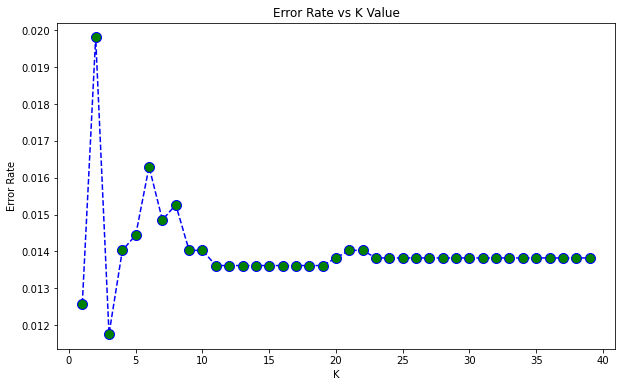

In [96]:
# Plot error rate vs K Value
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


***Retrain model with k=3***

In [97]:
#One of the values of k where accuracy is high and error is low is k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

***Model evaluation***

In [98]:
#Print confusion matrix
print(confusion_matrix(y_test,pred))
print('\n')
#Print classification report
print(classification_report(y_test, pred))

[[  17   50]
 [   7 4773]]


              precision    recall  f1-score   support

           0       0.71      0.25      0.37        67
           1       0.99      1.00      0.99      4780

    accuracy                           0.99      4847
   macro avg       0.85      0.63      0.68      4847
weighted avg       0.99      0.99      0.99      4847



In [99]:
#Accuracy for k=3 model
Actual = y_test
Predicted = knn.predict(x_test)
print(accuracy_score(Actual,Predicted)*100)

98.8240148545492


## Decision Tree Model

***Building Model***

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

***Training Model***

In [101]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

***Predicting Model on Test Data***

In [102]:
Predicted = dtree.predict(x_test)

***Model Evaluation***

In [103]:
#Confusion matrix
print(confusion_matrix(y_test,Predicted))

print('\n')

#Classification report
print(classification_report(y_test, Predicted))

[[  67    0]
 [   0 4780]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00      4780

    accuracy                           1.00      4847
   macro avg       1.00      1.00      1.00      4847
weighted avg       1.00      1.00      1.00      4847



In [104]:
#Accuracy for decision tree model
print(accuracy_score(y_test,Predicted)*100)

100.0


# Comparing Models

# Cross Validation Analysis

***Logistic Regression Model:***

In [105]:
#Accuracy for Logistic Regression model
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logmodel,x_train, y_train, cv = 10, scoring = "accuracy")
print(accuracy)

[0.98585323 0.97082228 0.98585323 0.98143236 0.98585323 0.98585323
 0.99911583 0.98408488 0.98141593 0.98584071]


In [106]:
#The average of all this accuracy should be chosen
accuracy.mean()*100

98.46124895346745

***kNN Model:***

In [107]:
#Accuracy for KNN model
acc = []
for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    accuracy = cross_val_score(knn,x_train, y_train, cv = 10, scoring = "accuracy")
    accuracy = accuracy.mean()*100
    acc.append(accuracy)
print(max(acc))

98.94761468823108


***Decision Tree Model:***

In [108]:
#Accuracy for decision tree model
accuracy = cross_val_score(dtree,x_train, y_train, cv = 10, scoring = "accuracy")
accuracy.mean()*100

99.99115826702034